In [17]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import numpy as np
from IPython.display import Audio
from pydub import AudioSegment
import os
import io
import requests
from pydub.playback import play
from scipy.signal import butter, lfilter
import numpy as np
from scipy.io.wavfile import write


* El código crea una señal de audio sintética combinando tres ondas sinusoidales de diferentes frecuencias y luego reproduce esta señal. La frecuencia de muestreo y la duración de la señal se ajustan para generar una experiencia auditiva específica.

In [2]:
framerate = 44100
t = np.linspace(0,5,framerate*2)
data = np.sin(2*np.pi*350*t) + np.sin(2*np.pi*350*t) + np.sin(2*np.pi*100*t)
Audio(data,rate=framerate)

* El código crea una señal de audio compleja mediante la suma de tres componentes sinusoidales de diferentes frecuencias. Luego, normaliza los datos para asegurarse de que estén en el rango correcto y utiliza Matplotlib para graficar la forma de onda de la señal.

C:\Users\juanm\AppData\Local\Temp\ipykernel_13008\42741543.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(1.0, 1.0)  # Ajusta estos valores según el rango que desees visualizar


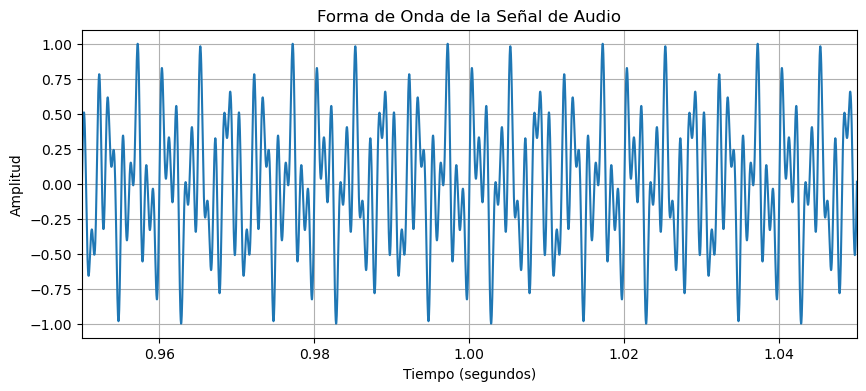

In [19]:
framerate = 44100
t = np.linspace(0, 5, int(framerate*5))
data = np.sin(2*np.pi*250*t) + np.sin(2*np.pi*1000*t) + np.sin(2*np.pi*600*t)

# Normaliza los datos entre -1 y 1 para asegurar que estén en el rango correcto para audio
data_normalized = data / np.max(np.abs(data))

# Graficar la forma de onda
plt.figure(figsize=(10, 4))
plt.plot(t, data_normalized)
plt.title('Forma de Onda de la Señal de Audio')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.xlim(1.0, 1.0)  # Ajusta estos valores según el rango que desees visualizar
plt.grid(True)
plt.show()

* Este código calcula y visualiza el espectro de frecuencia de una señal en el dominio de la frecuencia, proporcionando información sobre las frecuencias presentes en la señal. La limitación de las frecuencias a mostrar hasta 3000 Hz es ajustable según las necesidades del usuario.

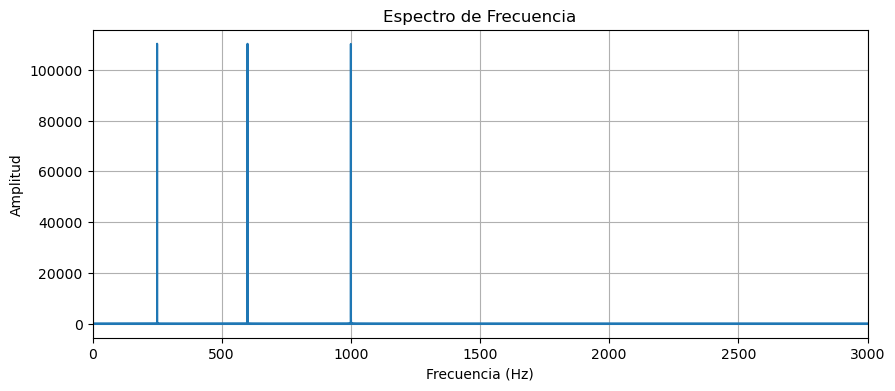

In [4]:
# Calcular la Transformada de Fourier
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(fft_result), 1/framerate)

# Plotear el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 3000.0)  # Ajusta estos valores según el rango que desees visualizar
plt.grid(True)
plt.show()

* este código carga el archivo de audio 'pistachio' incluido como ejemplo en la biblioteca librosa. Después de ejecutar este código, la variable filename contendrá la ruta al archivo de audio 'pistachio', que se puede utilizar para realizar diversas operaciones de análisis de audio utilizando librosa.

In [5]:
filename = librosa.example('pistachio')

C:\Users\juanm\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


* Después de ejecutar este código, tendrás acceso a la forma de onda de la señal de audio en 'y' y a la tasa de muestreo en 'sr', lo que te permitirá trabajar con la señal cargada en tu código.

In [6]:
y, sr = librosa.load(filename)

* este código específico está graficando la secuencia de valores en 'y' en el eje y. Es posible que 'y' represente una señal de audio. La función plot crea un gráfico simple de la secuencia de valores, conectando los puntos con líneas.

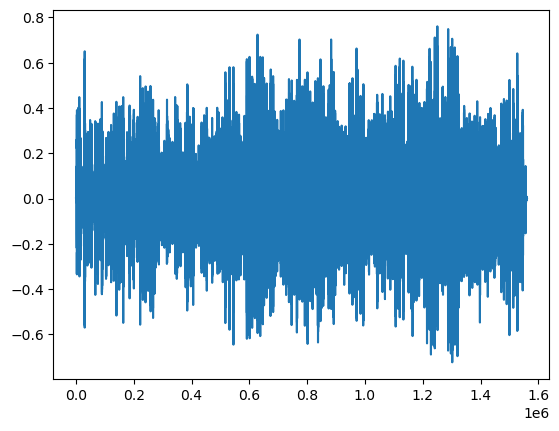

In [7]:
plt.plot(y)

* Este código se usa para crear un objeto de audio, con la intención de reproducirlo un audio entorno que admita la manipulación de datos de audio.

In [8]:
Audio(data=y, rate=sr)

* Este cogigo calcula la trasformada de fourier

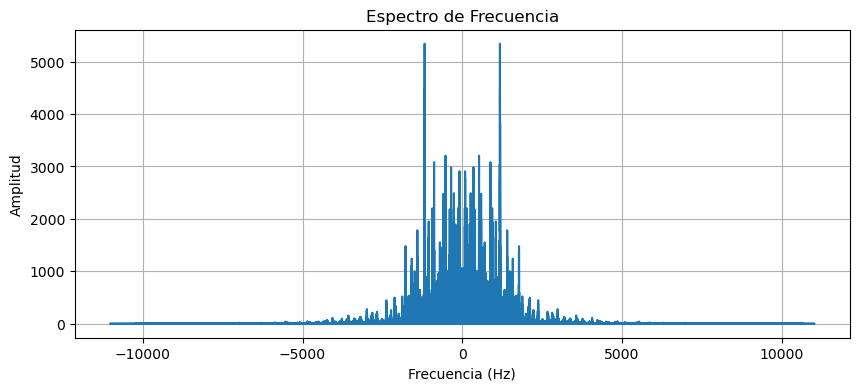

In [15]:
# Calcular la Transformada de Fourier
fft_result = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(fft_result), 1/sr)

# Plotear el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud') 
#plt.xlim(0, 3000.0)  # Ajusta estos valores según el rango que desees visualizar
plt.grid(True)
plt.show()

* En este codigo se filtro la señal

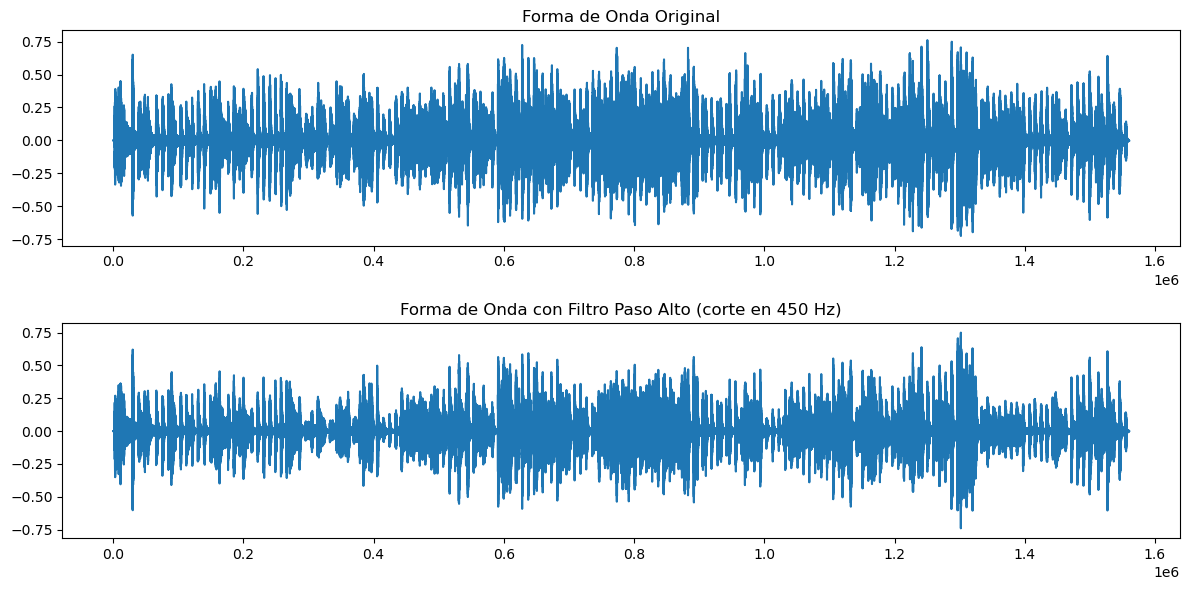

In [12]:
# Cargar la señal de audio
filename = librosa.example('pistachio')
y, sr = librosa.load(filename)

# Función para diseñar un filtro paso alto
def butter_highpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Función para aplicar un filtro a la señal
def butter_highpass_filter(data, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Definir la frecuencia de corte del filtro paso alto
cutoff_frequency = 450.0

# Aplicar el filtro paso alto a la señal de audio
y_highpass = butter_highpass_filter(y, cutoff_frequency, sr)

# Graficar la forma de onda original y la filtrada
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Forma de Onda Original')

plt.subplot(2, 1, 2)
plt.plot(y_highpass)
plt.title('Forma de Onda con Filtro Paso Alto (corte en 450 Hz)')

plt.tight_layout()
plt.show()

* En este codigo se calculo el Espectrograma de frecuencia 

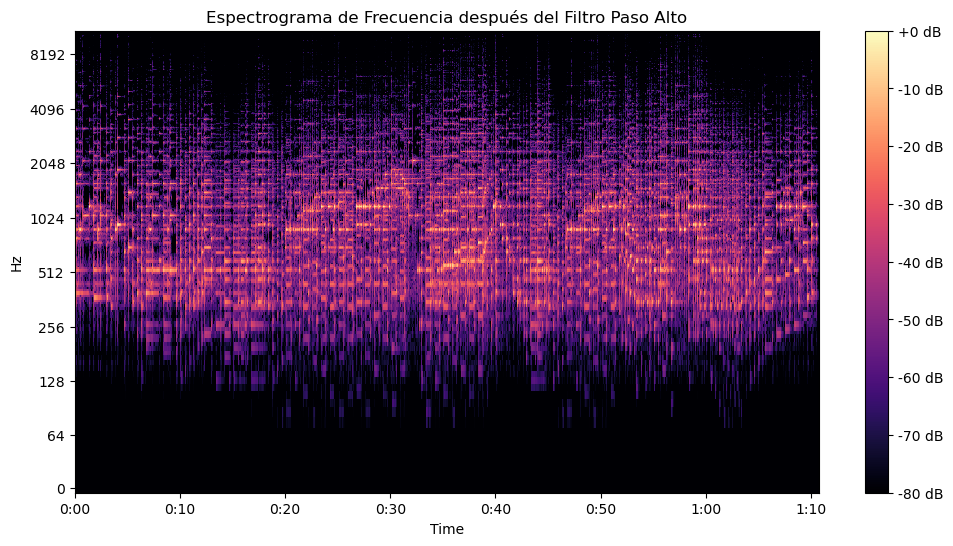

In [13]:
# Cargar la señal de audio
filename = librosa.example('pistachio')
y, sr = librosa.load(filename)

# Función para diseñar un filtro paso alto
def butter_highpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Función para aplicar un filtro a la señal
def butter_highpass_filter(data, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Definir la frecuencia de corte del filtro paso alto
cutoff_frequency = 450.0

# Aplicar el filtro paso alto a la señal de audio
y_highpass = butter_highpass_filter(y, cutoff_frequency, sr)

# Calcular el espectrograma de frecuencia
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_highpass)), ref=np.max)

# Graficar el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Frecuencia después del Filtro Paso Alto')
plt.show()

* En estwe codigo se mostro la señal filtrada

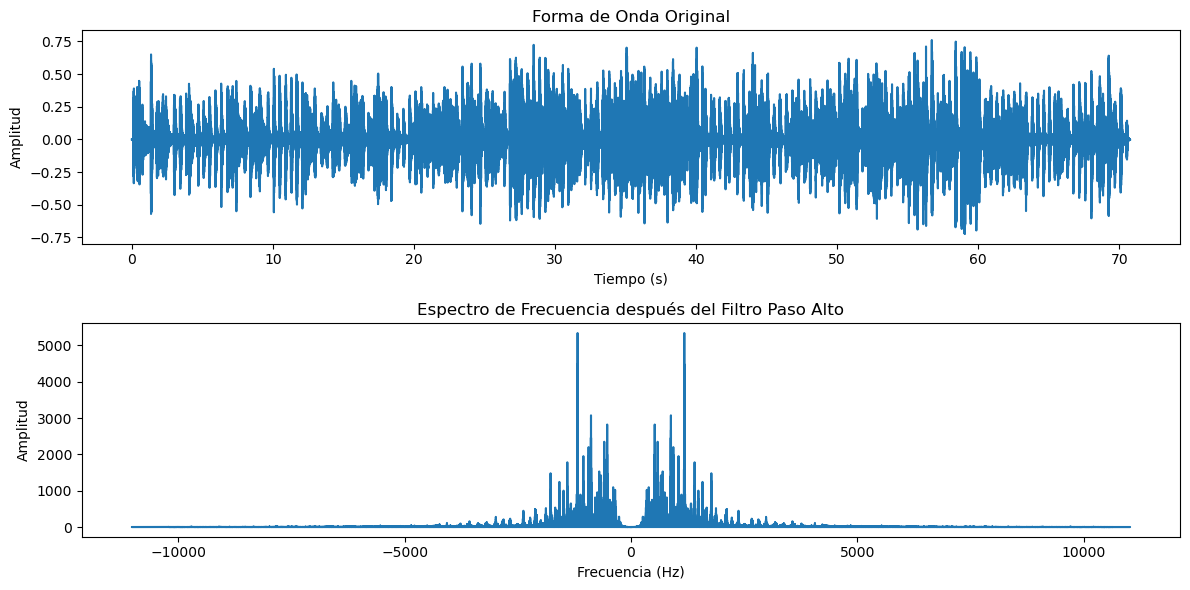

In [14]:
# Cargar la señal de audio
filename = librosa.example('pistachio')
y, sr = librosa.load(filename)

# Funciones para el filtro paso alto
def butter_highpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Definir la frecuencia de corte del filtro paso alto
cutoff_frequency = 450.0

# Aplicar el filtro paso alto a la señal de audio
y_highpass = butter_highpass_filter(y, cutoff_frequency, sr)

# Calcular la Transformada de Fourier de la señal filtrada
fft_result_highpass = np.fft.fft(y_highpass)
fft_freq_highpass = np.fft.fftfreq(len(fft_result_highpass), 1/sr)

# Graficar el espectro de frecuencia de la señal original y la señal filtrada
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Forma de Onda Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(fft_freq_highpass, np.abs(fft_result_highpass))
plt.title('Espectro de Frecuencia después del Filtro Paso Alto')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

* En esye codigo se reproduce el audio filtado

In [16]:
Audio(data=y_highpass, rate=sr)